In [201]:
%matplotlib inline

import math
import json
import matplotlib.pyplot as plt

with open('alephVpA.json') as f:
    aleph_vpa = json.load(f)['data']
with open('alephV.json') as f:
    aleph_v = json.load(f)['data']
with open('alephA.json') as f:
    aleph_a = json.load(f)['data']    
    
# old
with open('aleph05VpA.json') as f:
    aleph05_vpa = json.load(f)['data']    

ModuleNotFoundError: No module named 'matplotlib.rc'

## Select Data

In [226]:
data = aleph_v
name = "V"

## Data to Spectral Function

In [227]:
sTau = 1.77682**2
BVpA = 51.116
Be = 17.815
Vud = 0.97425
SEW = 1.0201
        
def kinematicWeight(x):
    return (1-x)**2*(1+2*x)

def specFkt(s, sfm2, ds):
    res = 1
    return sTau/12/math.pi**2/SEW/Vud**2/Be/kinematicWeight(s/sTau)/ds*sfm2

rho = list(map(lambda i: specFkt(data['sbin'][i], data['sfm2'][i], data['dsbin'][i]), range(len(data['sbin']))))
rhoErr = list(map(lambda i: specFkt(data['sbin'][i], data['derr'][i], data['dsbin'][i]), range(len(data['sbin']))))

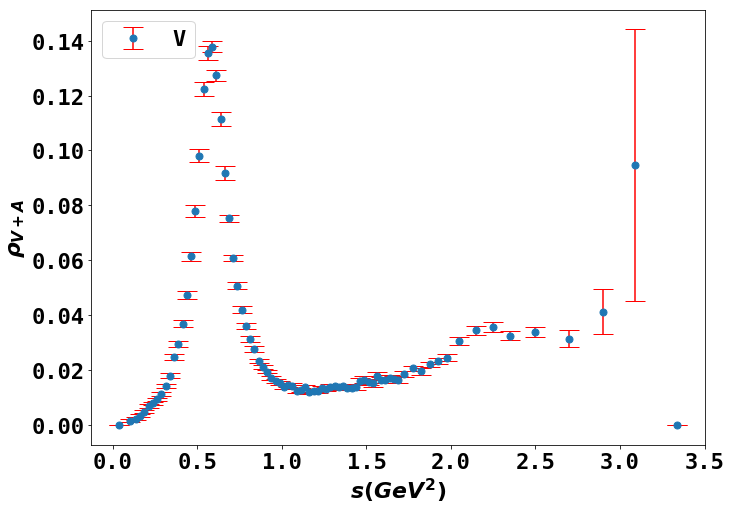

In [228]:
font = {'family' : 'monospace', 'size'   : 22}

plt.rc('font', **font)
line = plt.errorbar(aleph_vpa['sbin'], rho, ecolor='r', yerr=rhoErr, capsize=10, fmt='o', markersize=7, label=name)
# axes = plt.gca()
#axes.set_ylim([-0.01,0.06])
plt.legend(handles=[line])
plt.ylabel(r'$\rho_{V+A}$')
plt.xlabel('$s(GeV^2)$')
fig = plt.gcf() 
fig.set_size_inches(11,8)

plt.savefig(name+'.png', transparent=True)
plt.show()